## Please document and write docstrings for every function and line of code to demonstrate and explain what it does.

In [123]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

# Create Data

<h5> Generate some data with:
\begin{equation} \theta_0= 4 \end{equation} 
\begin{equation} \theta_1= 3 \end{equation} 

Add some Gaussian noise to the data

In [124]:
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)  # function with random noise at each point

Let's plot our data to check the relation between X and Y

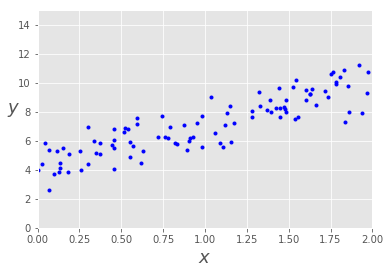

In [125]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)      # italic (Latex command)
plt.ylabel("$y$", rotation=0, fontsize=18)
#_ =    # underscore: used as return value that is not needed later
plt.axis([0,2,0,15]);

#  Analytical way of Linear Regression

In [126]:
'''add a constant to X'''
X_b = np.c_[np.ones((100,1)),X]    # concatenate in numpy to add a constant to X
X_b[:5]

array([[1.        , 0.13076888],
       [1.        , 1.14671237],
       [1.        , 1.54193914],
       [1.        , 1.39359134],
       [1.        , 1.62613116]])

In [127]:
'''calculate least squares (optimal) parameter values (see formula below)'''
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  
# dot = dot product (Skalarprodukt), T = transponated, inv = inverse
print(theta_best)  

[[4.22045436]
 [2.91009934]]


- Least Suqares Estimator for beta: 
$\hat{β} = (X^{T}X)^{-1}X^{T}y$

<h5>This is close to our real thetas 4 and 3. It cannot be accurate due to the noise I have introduced in data

In [128]:
'''create new X with values x=0 and x=2 (and a constant)'''
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]   # add ones as constant to X matrix
X_new_b

array([[1., 0.],
       [1., 2.]])

In [129]:
'''calculates predicted values for x = 0 and x = 2 via y^ = β^X_new (dot product)'''
y_predict = X_new_b.dot(theta_best)  
y_predict

array([[ 4.22045436],
       [10.04065304]])

In [130]:
4.32778469*1 + 2.75371942*0  # first value predicted (here by hand)

4.32778469

In [131]:
4.32778469*1 + 2.75371942*2  # second value predicted (here by hand)

9.83522353

<h5>Let's plot prediction line with calculated:theta

[0, 2, 0, 15]

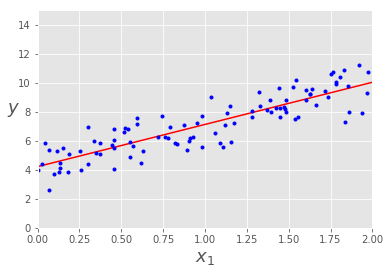

In [132]:
plt.plot(X_new,y_predict,'r-')   # use the two point from above to draw regression line
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

# Gradient Descent

## Cost Function & Gradients

<h4> The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have  to be derived from the cost functions

In [133]:
# m = samples in data set
# h(theta) = predictions of linear model using theta
# alpha = learning rate

<b>Cost</b>
\begin{equation}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}(h(\theta)^{(i)} - y^{(i)}) \cdot X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha \cdot (\frac{1}{m}  \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}) \cdot x_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha \cdot (\frac{1}{m}  \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha \cdot (\frac{1}{m}  \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}) \cdot x_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha \cdot (\frac{1}{m}  \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)})
\end{equation}

In [134]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)   # insert X with intercept column
    cost = (1/(2*m)) * np.sum(np.square(predictions-y))  # numpy square   # changed 1/2*m to 1/(2*m)
    return cost

<b>Gradients</b>
\begin{equation}
\theta_j: = \theta_j -\alpha \cdot \frac{1}{m}  (\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)})
\end{equation}

In [135]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))  # dot product (takes sum over all m)
        theta_history[it,:] = theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

<h3> Let's start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution

In [136]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]  # add constant to X
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.120
Theta1:          2.995
Final cost/MSE:  0.444


<h3> Let's plot the cost history over iterations

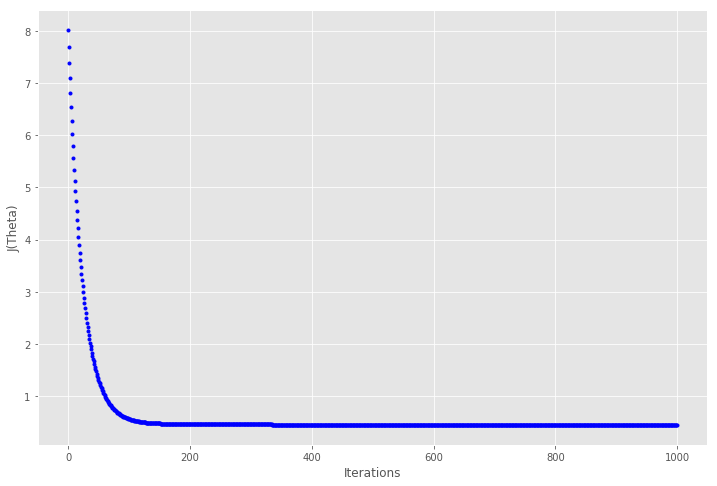

In [137]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

<h3> After around 150 iterations the cost is flat so the remaining iterations  are not needed or will not result in any further optimization. Let us zoom in till iteration 200 and see the curve

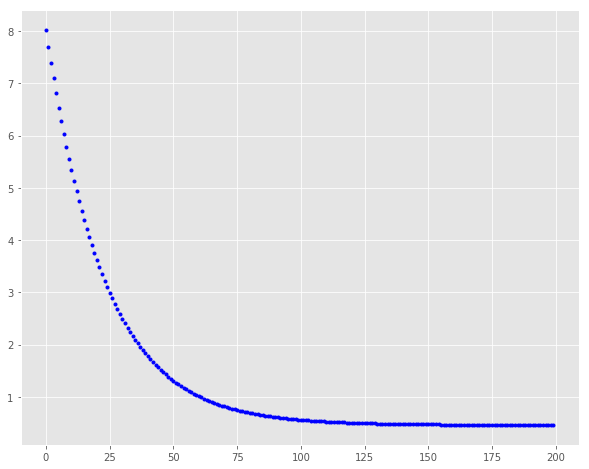

In [138]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

<b>It is worth while to note that the cost drops faster initially and then the gain in cost reduction is not as much

### It would be great to see the effect of different learning rates and iterations together

### Let us  build a function which can show the effects together and also show how gradient decent actually is working

In [139]:
def plot_GD(n_iter,lr,ax,ax1=None):
    """
    n_iter = no of iterations
    lr = Learning Rate
    ax = Axis to plot the Gradient Descent
    ax1 = Axis to plot cost_history vs Iterations plot

    """
    _ = ax.plot(X,y,'b.')            # plot true values
    theta = np.random.randn(2,1)     # initiate random theta

    tr =0.1                          # set transparancy for plotting (lower number = more transparent)
    cost_history = np.zeros(n_iter)
    
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)   # prediction before step
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)        # _ : don't return theta history
        pred = X_b.dot(theta)        # prediction after step
 
        cost_history[i] = h[0]

        if ((i % 25 == 0) ):         # plot predicted line for each 25th step
            _ = ax.plot(X,pred,'r-',alpha=tr)
        
            if tr < 0.8:             # decrease transparency with each line 
                tr = tr+0.2          # maximal transparancy = 0.9
    if not ax1== None:               # if a second axis in given as input, then plot also the cost history
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

### Plot the graphs for different iterations and learning rates combination

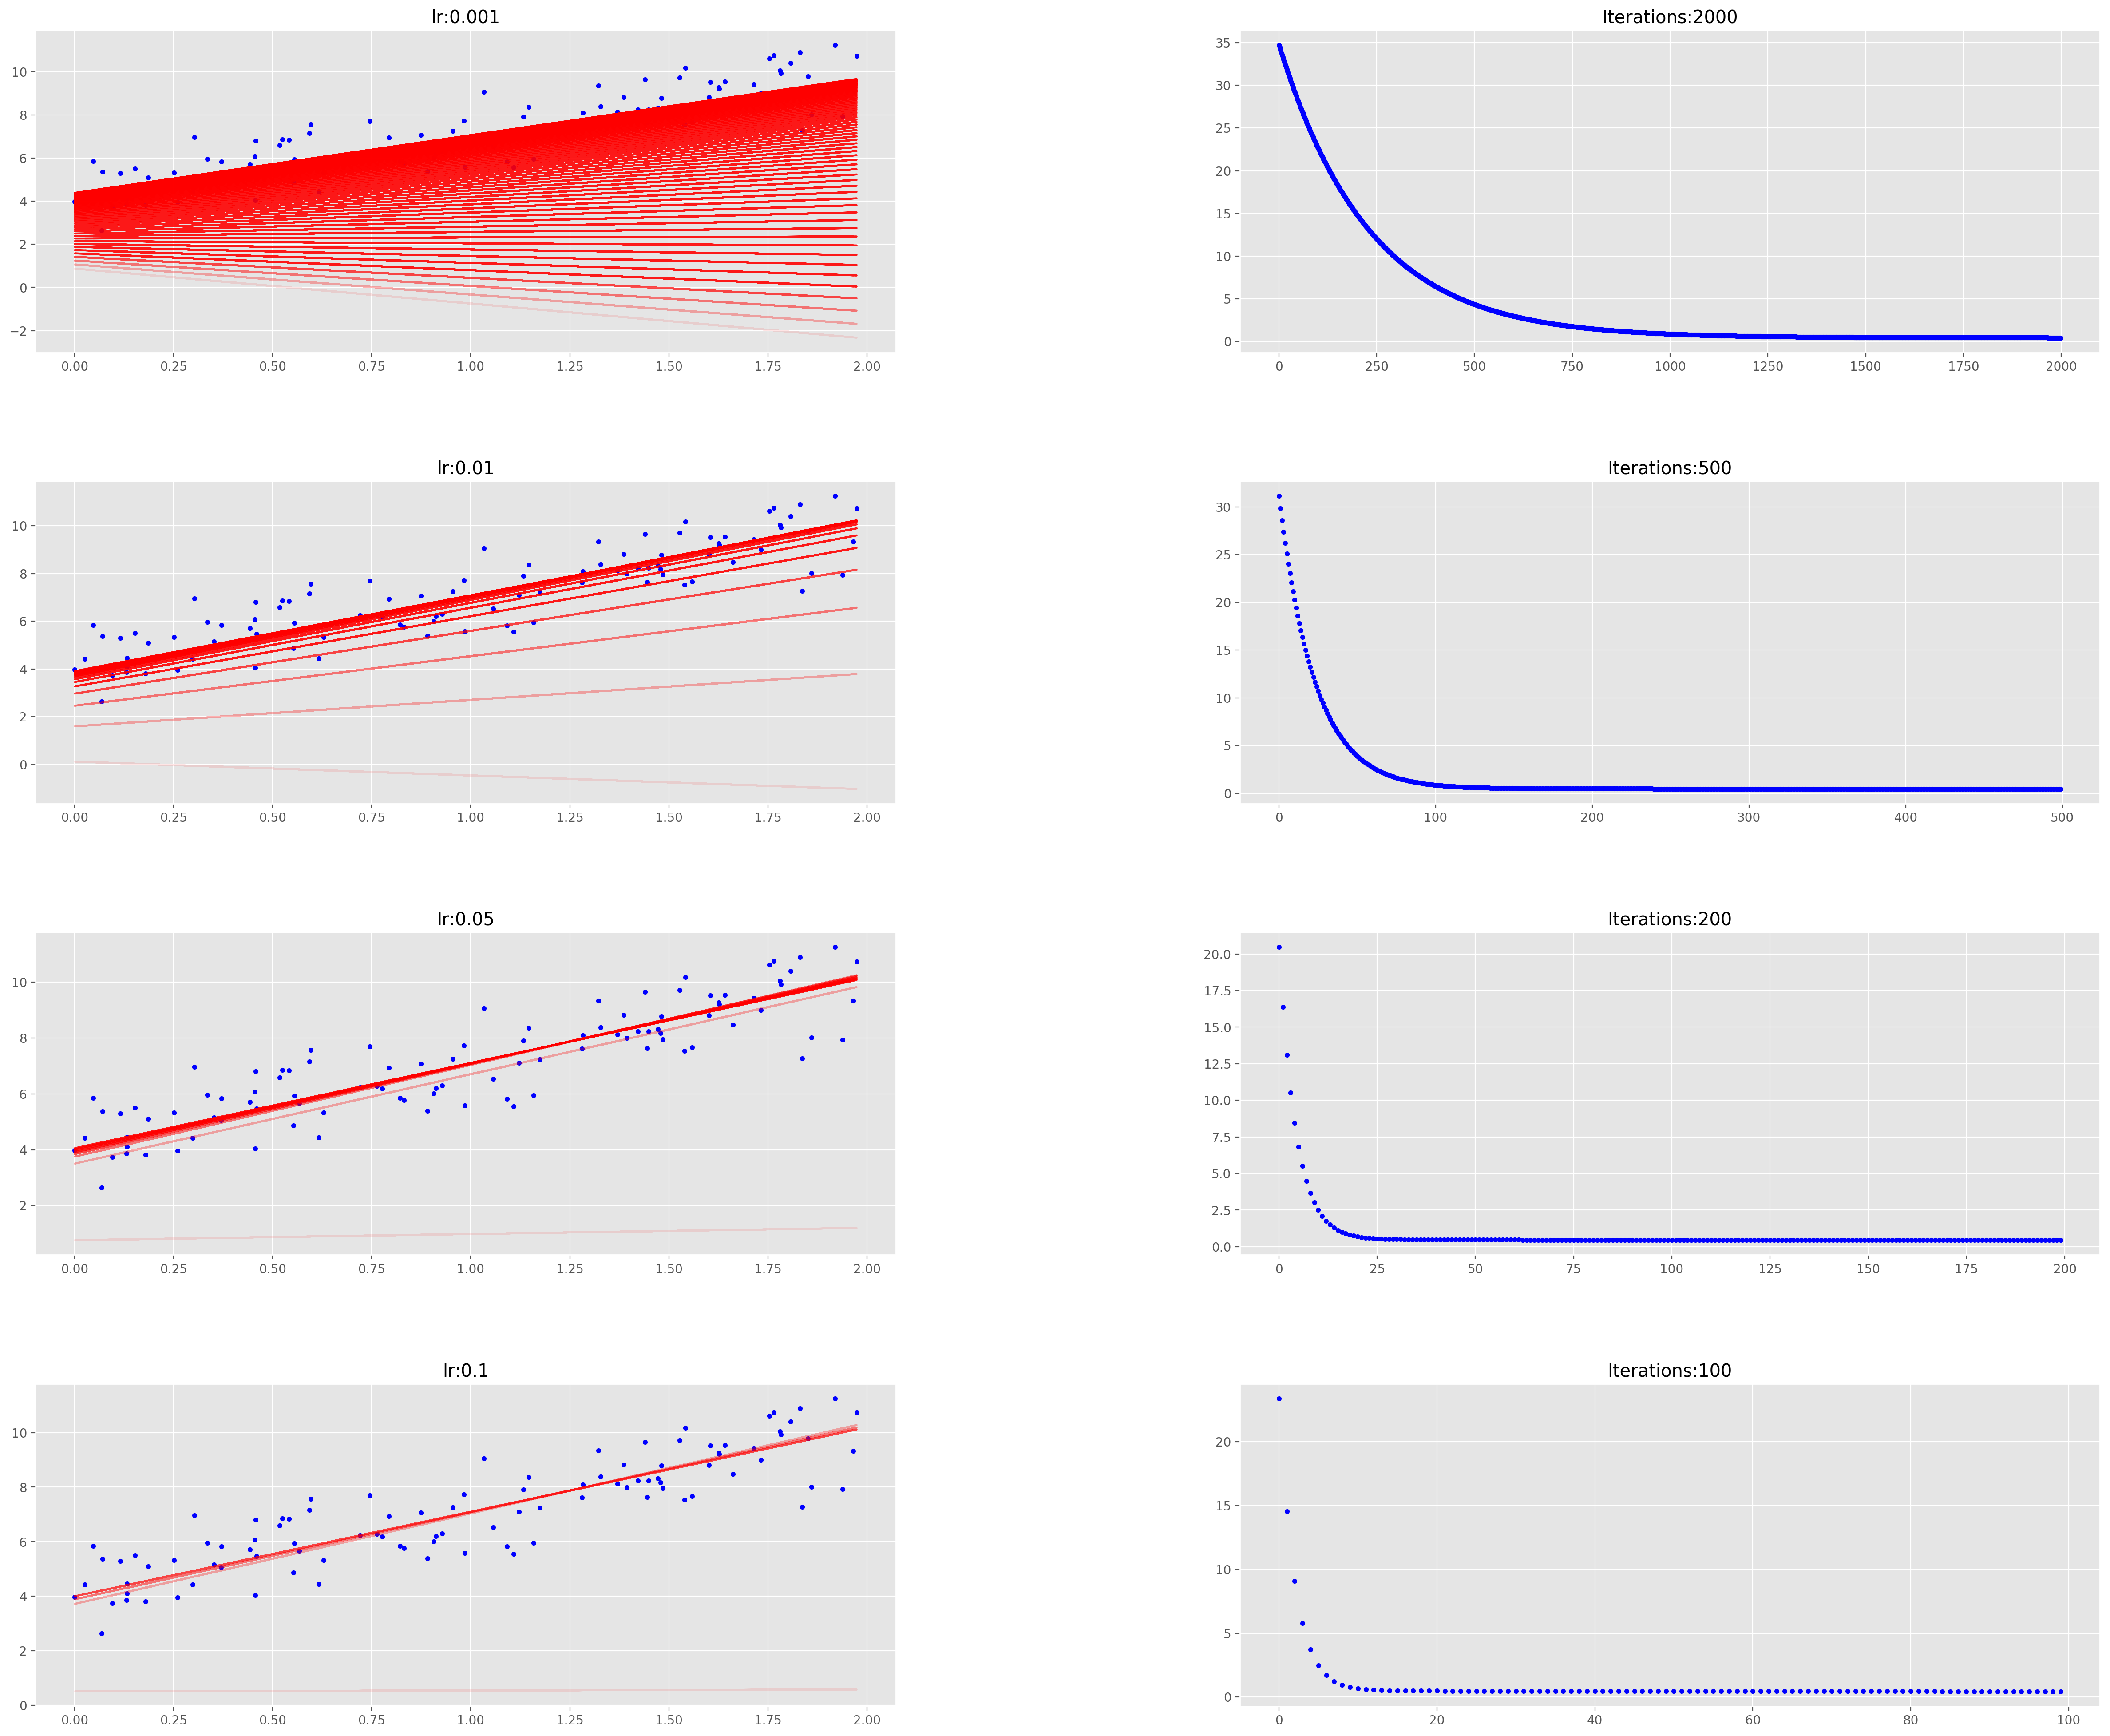

In [140]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)  # add subplot (4 rows, 2 columns) at index 'count'
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1) 

<b> See how useful it is to visualize the effect of learning rates and iterations on gradient descent. The red lines show how the gradient descent starts and then slowly gets closer to the final value

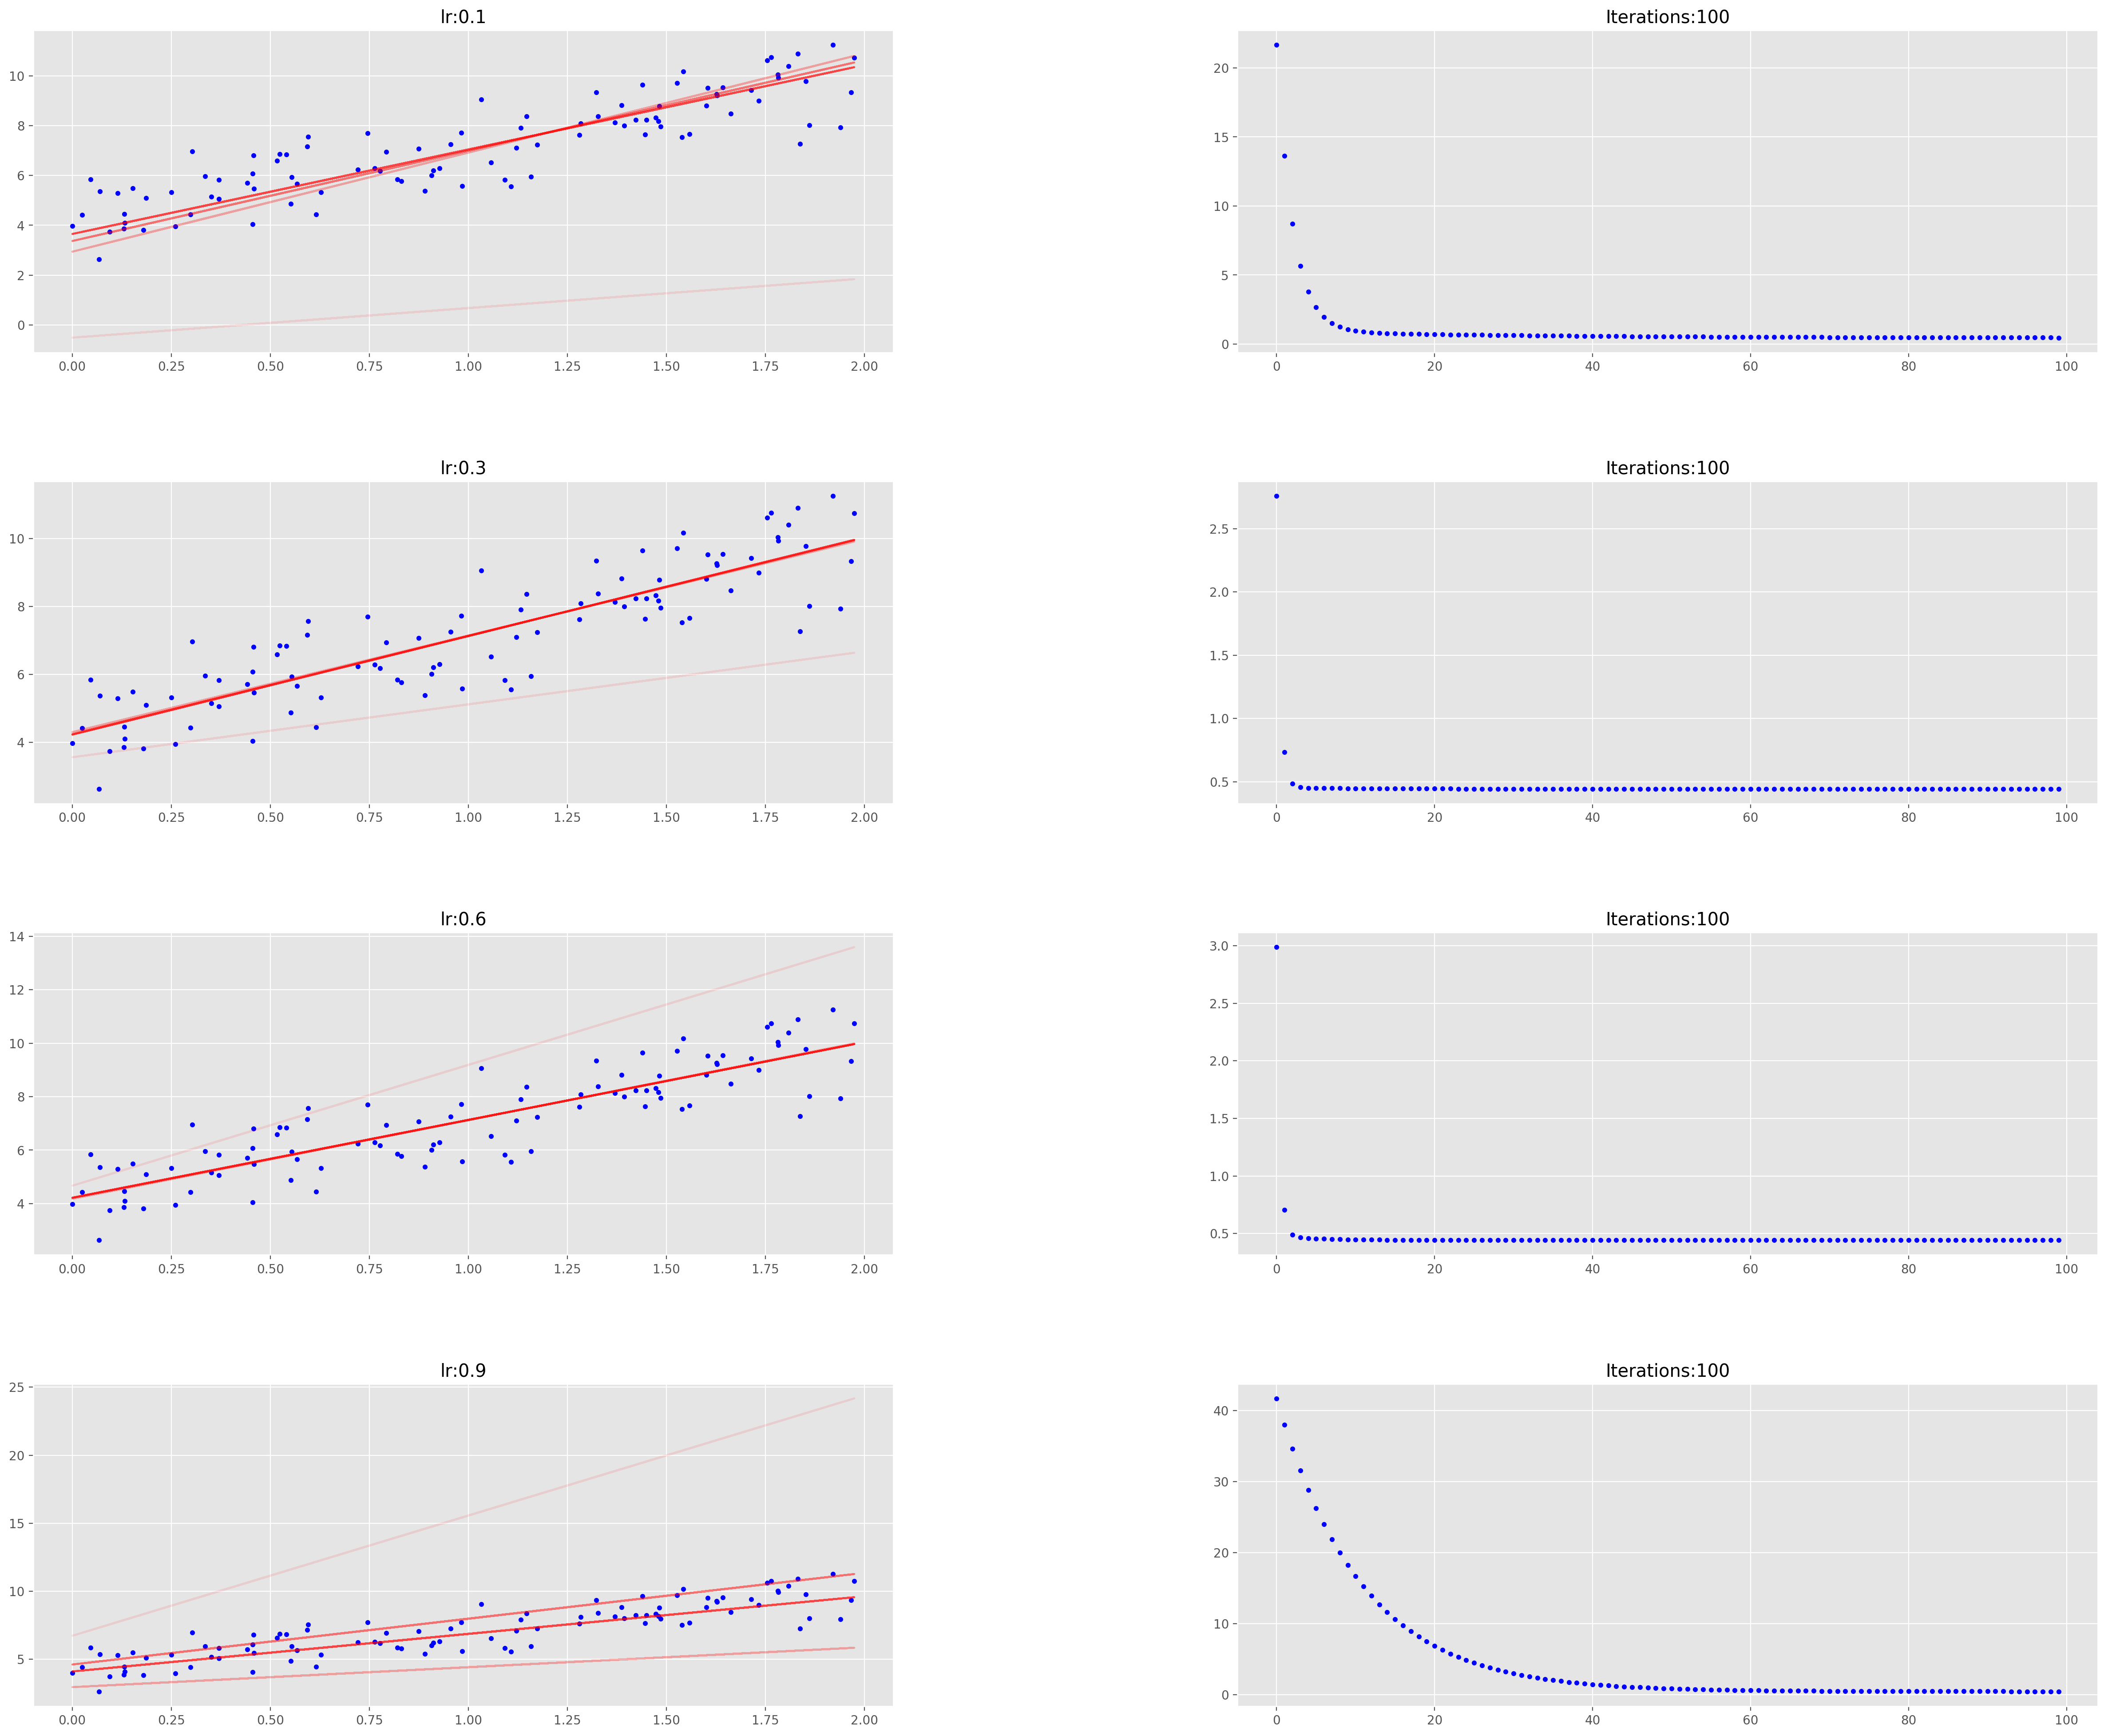

In [141]:
# repeat again for higher learning rates
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(100,0.1),(100,0.3),(100,0.6),(100,0.9)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)  # add subplot (4 rows, 2 columns) at index 'count'
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

## You can always plot Indiviual graphs to zoom in

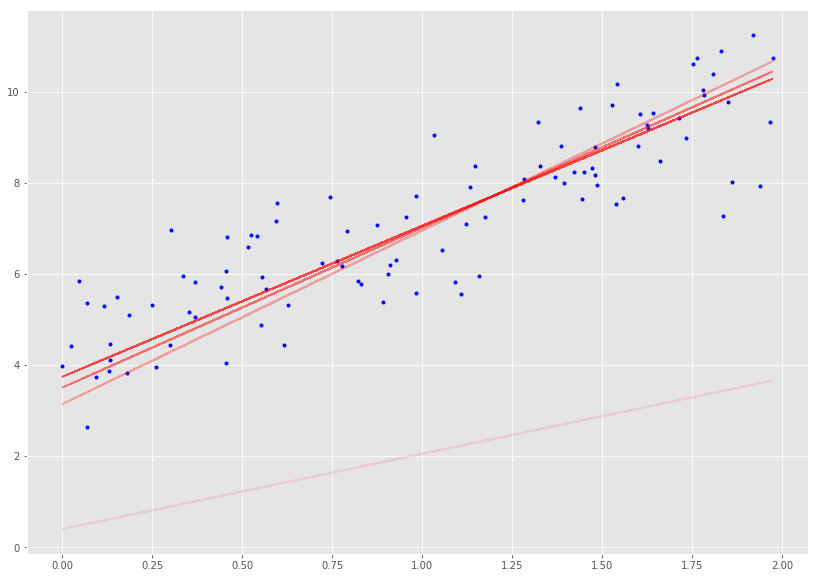

In [142]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

# Stochastic Gradient Descent

In [143]:
def stochastic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):        # here: take one random index per loop, m times (index might repeat itself)
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [144]:
import random
def stochastic_gradient_descent_shuffle(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost =0.0
        shuffled_idx = list(range(m))
        random.shuffle(shuffled_idx)
        for i in shuffled_idx:    # here: take each index once, but in shuffled order
            rand_ind = np.random.randint(0,m)
            
            X_i = X[i,:].reshape(1,X.shape[1]) 
            y_i = y[i].reshape(1,1)         
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [145]:
# try with first function
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stochastic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.210,
Theta1:          2.895
Final cost/MSE:  44.398


In [146]:
# try the same with second function
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stochastic_gradient_descent_shuffle(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.206,
Theta1:          2.917
Final cost/MSE:  43.656


Conclusion: Both implementations of stochastic gradient descent give similar results.

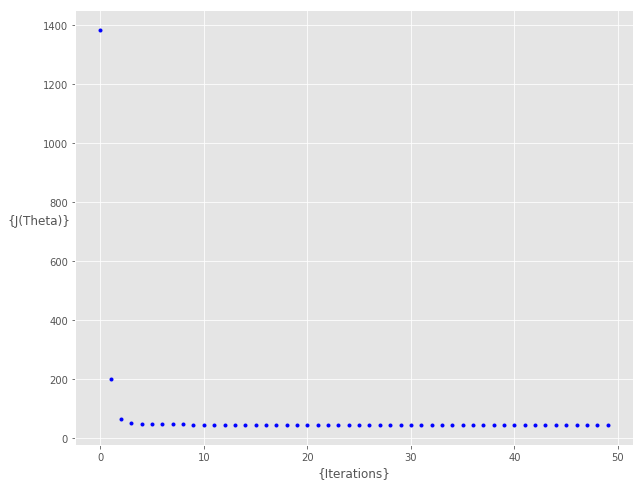

In [147]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

# Mini Batch Gradient Descent

In [148]:
import math

def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = math.ceil(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)   # shuffle X and y at each iteration
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):      # stepsize = batch_size
            X_i = X[i:i+batch_size]          # for last batch, indices might even be larger than max. index
            y_i = y[i:i+batch_size]          #                 in that case, the last index is the max. one
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [149]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)

theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.160,
Theta1:          2.959
Final cost/MSE:  2.213


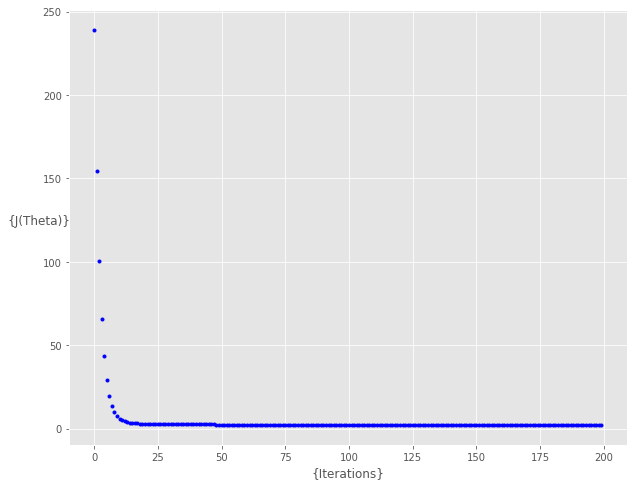

In [150]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')